In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
location = "/mnt/ntfs2/Development/python/"

In [3]:
data = pd.read_csv(location+"NN-from-Scratch/data/train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n  = data.shape
np.random.shuffle(data)

In [6]:
val_data = data[:1000].T
val_y = val_data[0]
val_X = val_data[1:n]
val_X = val_X / 255.

In [7]:
train_data = data[1000:m].T
train_y = train_data[0]
train_X = train_data[1:n]
train_X = train_X / 255.

In [8]:
train_X[:2], train_X[:,2].shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (784,))

In [9]:
train_y[0]

9

In [10]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def d_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * d_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions ==Y)/Y.size

def gradient_descent(X,Y,alpha,epochs):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1,A1,Z2,A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1,db1,dW2,db2 = backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10 ==0:
            print("epoch",i)
            predictions = get_predictions(A2)
            print("Accuracy",get_accuracy(predictions,Y))
    return W1,b1,W2,b2

In [12]:
W1,b1,W2,b2 = gradient_descent(train_X,train_y,0.1,500)

epoch 0
[0 0 0 ... 0 1 0] [9 6 9 ... 6 3 2]
Accuracy 0.09865853658536586
epoch 10
[8 8 9 ... 2 1 7] [9 6 9 ... 6 3 2]
Accuracy 0.20214634146341465
epoch 20
[8 6 9 ... 2 1 7] [9 6 9 ... 6 3 2]
Accuracy 0.305
epoch 30
[4 6 9 ... 2 1 8] [9 6 9 ... 6 3 2]
Accuracy 0.3761951219512195
epoch 40
[4 6 9 ... 2 1 6] [9 6 9 ... 6 3 2]
Accuracy 0.43441463414634146
epoch 50
[4 6 9 ... 2 1 8] [9 6 9 ... 6 3 2]
Accuracy 0.48741463414634145
epoch 60
[4 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.5314878048780488
epoch 70
[9 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.5654146341463414
epoch 80
[9 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.5947560975609756
epoch 90
[9 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.619609756097561
epoch 100
[9 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.642
epoch 110
[9 6 9 ... 2 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.6611707317073171
epoch 120
[9 6 9 ... 6 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.6781219512195122
epoch 130
[9 6 9 ... 6 3 8] [9 6 9 ... 6 3 2]
Accuracy 0.694560975609756

In [13]:
def make_predictions(X,W1,b1,W2,b2):
    _, _, _, A2 =  forward_propagation(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

In [14]:
def test_prediction(index, W1,b1,W2,b2):
    image = train_X[:,index,None]
    prediction = make_predictions(train_X[:,index,None],W1,b1,W2,b2)

    label = train_y[index]
    print("Prediction: ",prediction)
    print("Label: ",label)

    image = image.reshape((28,28))*255
    plt.imshow(image,interpolation='nearest')
    plt.show()

In [15]:
make_predictions(train_X[:,0],W1,b1,W2,b2)

array([5, 5, 5, 0, 5, 0, 5, 5, 5, 5])

Prediction:  [9]
Label:  9


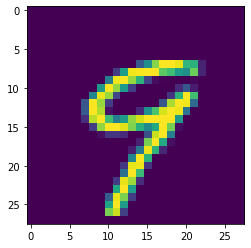

Prediction:  [6]
Label:  6


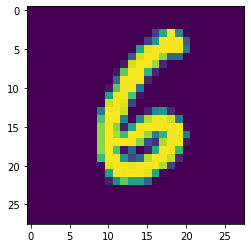

Prediction:  [9]
Label:  9


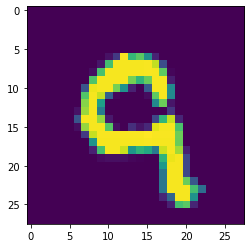

Prediction:  [4]
Label:  2


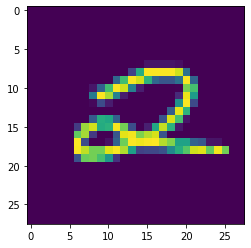

In [16]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:
val_predictions = make_predictions(val_X,W1,b1,W2,b2)
accuracy = get_accuracy(val_predictions,val_y)

[0 9 2 1 6 6 0 5 9 3 4 8 4 0 9 2 2 5 1 1 4 9 6 0 0 6 7 0 3 6 3 1 0 8 7 6 2
 9 4 0 4 4 5 7 9 6 9 6 8 2 6 1 3 9 3 7 0 8 6 3 8 2 3 1 8 8 7 2 6 0 9 9 0 2
 3 6 6 3 3 2 3 2 5 7 9 6 8 3 5 0 0 0 8 7 6 8 7 0 8 3 1 0 1 7 3 9 4 3 1 4 8
 3 9 2 6 4 9 1 3 5 4 5 6 4 9 8 9 2 0 0 5 2 7 5 1 4 3 3 1 5 2 6 0 9 1 6 3 5
 4 9 1 7 2 9 9 5 9 3 6 9 4 9 2 3 3 3 8 3 8 5 7 7 0 3 9 6 8 7 1 5 0 3 9 6 1
 8 2 7 3 4 9 4 4 1 0 0 4 6 8 1 0 6 9 7 7 8 2 1 7 7 1 6 0 7 2 8 8 3 2 7 3 8
 7 9 2 2 3 1 1 3 0 1 3 6 3 9 3 2 2 9 0 1 4 4 3 0 9 7 5 3 8 0 9 1 9 3 7 1 5
 4 1 4 0 3 8 1 7 7 3 0 0 8 5 5 4 4 7 7 7 3 2 7 4 1 2 5 9 8 5 2 3 5 9 4 8 8
 2 3 3 1 9 7 8 0 4 0 4 5 8 2 2 8 3 2 4 6 2 4 5 3 7 9 8 4 3 0 0 8 6 0 7 0 0
 8 4 1 1 1 1 4 2 2 5 9 4 8 9 1 2 3 7 3 6 6 2 3 4 2 9 9 7 7 9 4 6 6 5 5 1 7
 6 7 2 7 0 5 5 6 2 4 0 7 2 4 6 5 9 9 4 2 2 7 0 0 7 2 6 2 3 3 6 4 3 0 3 5 3
 5 7 7 3 0 7 6 1 2 8 9 7 7 5 7 7 9 5 6 0 4 0 6 8 8 5 8 8 9 8 0 9 4 1 3 0 0
 4 9 0 1 5 6 1 9 1 9 5 7 4 4 1 2 6 2 4 6 5 5 2 7 0 3 1 9 5 0 0 8 9 6 4 2 1
 6 0 2 3 0 7 1 3 2 3 4 2 

In [20]:
print("Validation Accuracy(%): ",accuracy*100)

Validation Accuracy:  0.834
